<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_2_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.626727,32.684308,56.070536,79.862621,0.009724,262.253916,262.244428,0.009488
1,0.0,1.0,89.436797,89.248153,74.492078,84.075655,-0.005810,347.246874,347.248649,-0.001776
2,0.0,2.0,98.655918,36.338132,68.548829,99.688499,-0.004236,313.227143,313.228982,-0.001839
3,0.0,3.0,77.062221,25.005316,96.872157,98.424191,0.012106,307.375991,307.362393,0.013598
4,0.0,4.0,52.793196,88.032053,23.893861,59.904663,0.001293,234.625068,234.625046,0.000022
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.873883,34.938346,96.204448,22.047539,-0.012026,260.052191,260.063674,-0.011483
249996,999.0,246.0,97.269265,40.375681,93.920207,29.735666,0.034292,271.335110,271.300632,0.034478
249997,999.0,247.0,48.369211,57.860063,82.654207,61.143208,0.000634,260.027323,260.027338,-0.000015
249998,999.0,248.0,29.209461,37.259984,87.224997,84.941840,0.003544,248.639825,248.637590,0.002234


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.626727  32.684308  56.070536  79.862621  0.009724  262.253916   
      1.0    89.436797  89.248153  74.492078  84.075655 -0.005810  347.246874   
      2.0    98.655918  36.338132  68.548829  99.688499 -0.004236  313.227143   
      3.0    77.062221  25.005316  96.872157  98.424191  0.012106  307.375991   
      4.0    52.793196  88.032053  23.893861  59.904663  0.001293  234.625068   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  96.873883  34.938346  96.204448  22.047539 -0.012026  260.052191   
      246.0  97.269265  40.375681  93.920207  29.735666  0.034292  271.335110   
      247.0  48.369211  57.860063  82.654207  61.143208  0.000634  260.027323   
      248.0  29.209461  37.259984  87.224997  84.941840  0.003544  248.639825   
      249.0  50.774799  33.376463  58.753200  54.729197 -0.007489  207.626171   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.244428  0.009488  
      1.0    347.248649 -0.001776  
      2.0    313.228982 -0.001839  
      3.0    307.362393  0.013598  
      4.0    234.625046  0.000022  
...                 ...       ...  
999.0 245.0  260.063674 -0.011483  
      246.0  271.300632  0.034478  
      247.0  260.027338 -0.000015  
      248.0  248.637590  0.002234  
      249.0  207.632855 -0.006685  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.626727  32.684308  56.070536  79.862621  0.009724  262.253916   
      1.0    89.436797  89.248153  74.492078  84.075655 -0.005810  347.246874   
      2.0    98.655918  36.338132  68.548829  99.688499 -0.004236  313.227143   
      3.0    77.062221  25.005316  96.872157  98.424191  0.012106  307.375991   
      4.0    52.793196  88.032053  23.893861  59.904663  0.001293  234.625068   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  96.873883  34.938346  96.204448  22.047539 -0.012026  260.052191   
      246.0  97.269265  40.375681  93.920207  29.735666  0.034292  271.335110   
      247.0  48.369211  57.860063  82.654207  61.143208  0.000634  260.027323   
      248.0  29.209461  37.259984  87.224997  84.941840  0.003544  248.639825   
      249.0  50.774799  33.376463  58.753200  54.729197 -0.007489  207.626171   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.244428  0.009488  
      1.0    347.248649 -0.001776  
      2.0    313.228982 -0.001839  
      3.0    307.362393  0.013598  
      4.0    234.625046  0.000022  
...                 ...       ...  
999.0 245.0  260.063674 -0.011483  
      246.0  271.300632  0.034478  
      247.0  260.027338 -0.000015  
      248.0  248.637590  0.002234  
      249.0  207.632855 -0.006685  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.626727,32.684308,56.070536,79.862621,0.009724,262.253916,262.244428,0.009488
1,0.0,1.0,89.436797,89.248153,74.492078,84.075655,-0.005810,347.246874,347.248649,-0.001776
2,0.0,2.0,98.655918,36.338132,68.548829,99.688499,-0.004236,313.227143,313.228982,-0.001839
3,0.0,3.0,77.062221,25.005316,96.872157,98.424191,0.012106,307.375991,307.362393,0.013598
4,0.0,4.0,52.793196,88.032053,23.893861,59.904663,0.001293,234.625068,234.625046,0.000022
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.873883,34.938346,96.204448,22.047539,-0.012026,260.052191,260.063674,-0.011483
249996,999.0,246.0,97.269265,40.375681,93.920207,29.735666,0.034292,271.335110,271.300632,0.034478
249997,999.0,247.0,48.369211,57.860063,82.654207,61.143208,0.000634,260.027323,260.027338,-0.000015
249998,999.0,248.0,29.209461,37.259984,87.224997,84.941840,0.003544,248.639825,248.637590,0.002234


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    83.626727  32.684308  56.070536  79.862621  0.009724  262.253916   
      1.0    89.436797  89.248153  74.492078  84.075655 -0.005810  347.246874   
      2.0    98.655918  36.338132  68.548829  99.688499 -0.004236  313.227143   
      3.0    77.062221  25.005316  96.872157  98.424191  0.012106  307.375991   
      4.0    52.793196  88.032053  23.893861  59.904663  0.001293  234.625068   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  96.873883  34.938346  96.204448  22.047539 -0.012026  260.052191   
      246.0  97.269265  40.375681  93.920207  29.735666  0.034292  271.335110   
      247.0  48.369211  57.860063  82.654207  61.143208  0.000634  260.027323   
      248.0  29.209461  37.259984  87.224997  84.941840  0.003544  248.639825   
      249.0  50.774799  33.376463  58.753200  54.729197 -0.007489  207.626171   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.244428  0.009488  
      1.0    347.248649 -0.001776  
      2.0    313.228982 -0.001839  
      3.0    307.362393  0.013598  
      4.0    234.625046  0.000022  
...                 ...       ...  
999.0 245.0  260.063674 -0.011483  
      246.0  271.300632  0.034478  
      247.0  260.027338 -0.000015  
      248.0  248.637590  0.002234  
      249.0  207.632855 -0.006685  

[250000 rows x 8 columns]

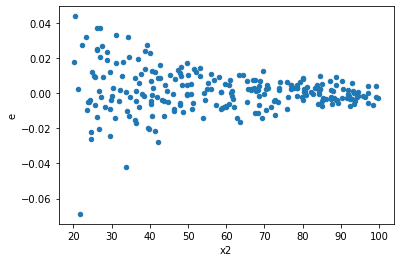

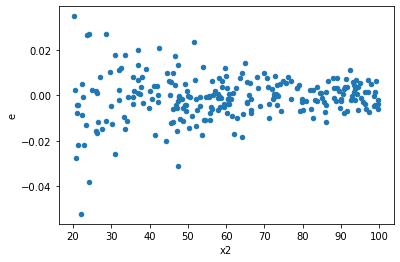

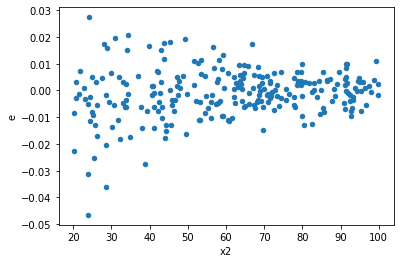

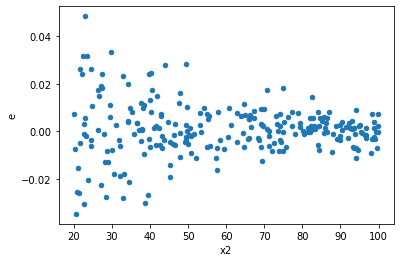

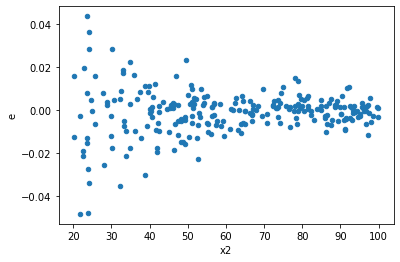

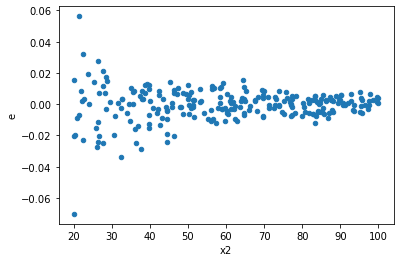

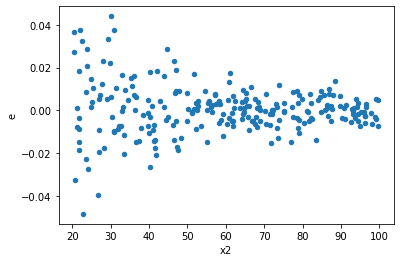

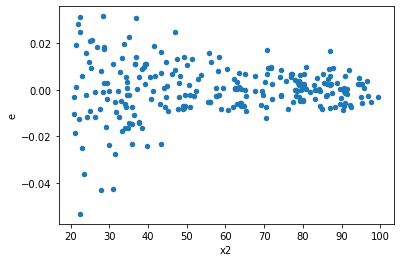

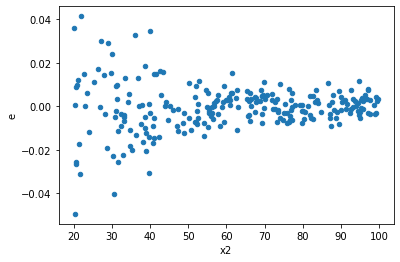

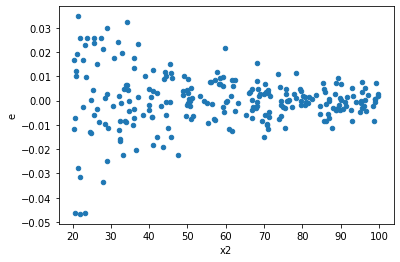

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,108.0,134.0,0.0029855633633031706,0.03220259593813085,2.76441052157701e-05,0.00024031788013530487,8.693277581587665,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,103.0,139.0,0.007151413018073954,0.012241315380172242,6.943119435023257e-05,8.806701712354131e-05,1.2684070603668987,0.19165241019862833,0.9041737949006858,0.09582620509931417,Reject005=1 : Homoscedasticity
4.0,105.0,137.0,0.009381784975459257,0.018636883301763402,8.935033309961197e-05,0.00013603564453841898,1.5224973407402973,0.021006837762977737,0.9894965811185111,0.010503418881488868,Reject005=0 : Heteroscedasticity
7.0,115.0,127.0,0.003540566427246789,0.02802127719943053,3.078753414997208e-05,0.00022063997794827188,7.166536198498118,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
10.0,130.0,112.0,0.01212432804393753,0.01946255133261985,9.326406187644253e-05,0.00017377277975553438,1.8632340931681795,0.0008090939234459693,0.999595453038277,0.00040454696172298465,Reject005=0 : Heteroscedasticity
14.0,116.0,126.0,0.0109064320672838,0.011868501910301121,9.402096609727414e-05,9.419445960556445e-05,1.001845264045796,0.9899311684003793,0.5050344157998103,0.49496558420018966,Reject005=1 : Homoscedasticity
17.0,128.0,114.0,0.011148357946472,0.012318508489698194,8.70965464568125e-05,0.00010805709201489643,1.240658744930574,0.24019189962882548,0.8799040501855873,0.12009594981441274,Reject005=1 : Homoscedasticity
18.0,122.0,120.0,0.0036439743365331142,0.028920478798754257,2.9868642102730445e-05,0.00024100398998961882,8.068796336998107,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
19.0,124.0,118.0,0.004547124427383424,0.024425663842740686,3.667035828535019e-05,0.00020699715120966683,5.644808528973718,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,108.0,134.0,0.0029855633633031706,0.03220259593813085,2.76441052157701e-05,0.00024031788013530487,8.693277581587665,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,107.0,135.0,0.014018312737089745,0.009310501260318309,0.0001310122685709322,6.896667600235784e-05,0.5264138752396166,0.0006243237803331543,Reject005=0 : Heteroscedasticity
2.0,103.0,139.0,0.007151413018073954,0.012241315380172242,6.943119435023257e-05,8.806701712354131e-05,1.2684070603668987,0.19165241019862833,Reject005=1 : Homoscedasticity
3.0,119.0,123.0,0.026391685002932604,0.0037704145873758317,0.00022177886557086222,3.065377713313684e-05,0.13821775602573105,6.526813233700546e-24,Reject005=0 : Heteroscedasticity
4.0,105.0,137.0,0.009381784975459257,0.018636883301763402,8.935033309961197e-05,0.00013603564453841898,1.5224973407402973,0.021006837762977737,Reject005=0 : Heteroscedasticity
5.0,104.0,138.0,0.01277965832837953,0.014813438022095605,0.0001228813300805724,0.00010734375378330149,0.8735562490487121,0.46943372756190993,Reject005=1 : Homoscedasticity
6.0,118.0,124.0,0.0220062028123142,0.011866428043856552,0.00018649324417215423,9.569700035368188e-05,0.5131392334262939,0.00029840583005004276,Reject005=0 : Heteroscedasticity
7.0,115.0,127.0,0.003540566427246789,0.02802127719943053,3.078753414997208e-05,0.00022063997794827188,7.166536198498118,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,123.0,119.0,0.019456737610192353,0.00886963982182954,0.00015818485861945002,7.453478841873564e-05,0.4711878815029078,4.28169343207924e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    592
Reject005=1 : Homoscedasticity      408
Name: Result_test, dtype: int64